In [1]:
!pip install spotipy

zsh:1: /usr/local/bin/pip: bad interpreter: /System/Library/Frameworks/Python.framework/Versions/2.7/Resources/Python.app/Contents/MacOS/Python: no such file or directory
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.4/140.4 kB 3.0 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 246.2/246.2 kB 5.1 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.5/61.5 kB 2.3 MB/s eta 0:00:00

[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: pip3 install --upgrade pip


In [5]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
cid = 'd3e048fac0e8438cab168ac60459044c'
secret = '4d47925e9199481fb41cc0c1406de938'
client_credentials_manager = SpotifyClientCredentials(
    client_id=cid, client_secret=secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

In [21]:
artist_name = []
track_name = []
track_popularity = []
artist_id = []
track_id = []
for i in range(0, 1000, 50):
    track_results = sp.search(q='year:2021', type='track', limit=50, offset=i)
    for i, t in enumerate(track_results['tracks']['items']):
        artist_name.append(t['artists'][0]['name'])
        artist_id.append(t['artists'][0]['id'])
        track_name.append(t['name'])
        track_id.append(t['id'])
        track_popularity.append(t['popularity'])


In [27]:
import pandas as pd
track_df = pd.DataFrame({'artist_name': artist_name, 'track_name': track_name,
                        'track_id': track_id, 'track_popularity': track_popularity, 'artist_id': artist_id})
print(track_df.shape)
track_df.head()


(1000, 5)


,artist_name,track_name,track_id,track_popularity,artist_id
0,Morgan Wallen,Wasted On You,3cBsEDNhFI9E82vPj3kvi3,82,4oUHIQIBe0LHzYfvXNW4QM
1,Nicky Youre,Sunroof,4h4QlmocP3IuwYEj2j14p8,89,7qmpXeNz2ojlMl2EEfkeLs
2,Drake,Knife Talk (with 21 Savage ft. Project Pat),2BcMwX1MPV6ZHP4tUT9uq6,84,3TVXtAsR1Inumwj472S9r4
3,Tory Lanez,The Color Violet,3azJifCSqg9fRij2yKIbWz,84,2jku7tDXc6XoB6MO2hFuqg
4,Drake,Wants and Needs (feat. Lil Baby),65OVbaJR5O1RmwOQx0875b,83,3TVXtAsR1Inumwj472S9r4


In [29]:
artist_popularity = []
artist_genres = []
artist_followers = []
for a_id in track_df.artist_id:
  artist = sp.artist(a_id)
  artist_popularity.append(artist['popularity'])
  artist_genres.append(artist['genres'])
  artist_followers.append(artist['followers']['total'])


In [30]:
track_df = track_df.assign(artist_popularity=artist_popularity,
                           artist_genres=artist_genres, artist_followers=artist_followers)
track_df.head()


,artist_name,track_name,track_id,track_popularity,artist_id,artist_popularity,artist_genres,artist_followers
0,Morgan Wallen,Wasted On You,3cBsEDNhFI9E82vPj3kvi3,82,4oUHIQIBe0LHzYfvXNW4QM,83,"[contemporary country, country]",4268613
1,Nicky Youre,Sunroof,4h4QlmocP3IuwYEj2j14p8,89,7qmpXeNz2ojlMl2EEfkeLs,72,[pop],78326
2,Drake,Knife Talk (with 21 Savage ft. Project Pat),2BcMwX1MPV6ZHP4tUT9uq6,84,3TVXtAsR1Inumwj472S9r4,97,"[canadian hip hop, canadian pop, hip hop, rap,...",68670658
3,Tory Lanez,The Color Violet,3azJifCSqg9fRij2yKIbWz,84,2jku7tDXc6XoB6MO2hFuqg,80,"[canadian hip hop, canadian trap, melodic rap,...",4783526
4,Drake,Wants and Needs (feat. Lil Baby),65OVbaJR5O1RmwOQx0875b,83,3TVXtAsR1Inumwj472S9r4,97,"[canadian hip hop, canadian pop, hip hop, rap,...",68670658


In [32]:
track_df.sort_values(by=['track_popularity'], ascending=False)[
    ['track_name', 'artist_name']].head(20)


,track_name,artist_name
1,Sunroof,Nicky Youre
5,Until I Found You,Stephen Sanchez
12,Woman,Doja Cat
126,Where Are You Now,Lost Frequencies
20,STAY (with Justin Bieber),The Kid LAROI
7,Happier Than Ever,Billie Eilish
11,traitor,Olivia Rodrigo
27,drivers license,Olivia Rodrigo
29,Yonaguni,Bad Bunny
15,deja vu,Olivia Rodrigo


In [33]:

by_art_fol = pd.DataFrame(track_df.sort_values(by=['artist_followers'], ascending=False)[
                          ['artist_followers', 'artist_popularity', 'artist_name', 'artist_genres']])
by_art_fol.astype(str).drop_duplicates().head(20)


,artist_followers,artist_popularity,artist_name,artist_genres
729,104848718,89,Ed Sheeran,"['pop', 'uk pop']"
841,84727614,87,Ariana Grande,"['dance pop', 'pop']"
589,71598447,87,Billie Eilish,"['art pop', 'electropop', 'pop']"
665,68670658,97,Drake,"['canadian hip hop', 'canadian pop', 'hip hop'..."
801,67321678,89,Justin Bieber,"['canadian pop', 'pop']"
982,61938852,100,Taylor Swift,['pop']
608,61466842,90,Eminem,"['detroit hip hop', 'hip hop', 'rap']"
29,58836637,97,Bad Bunny,"['reggaeton', 'trap latino']"
493,57153603,90,BTS,"['k-pop', 'k-pop boy group']"
949,52318368,93,The Weeknd,"['canadian contemporary r&b', 'canadian pop', ..."


fetch the tracks’ features and add them to the data frame

In [34]:
track_features = []
for t_id in track_df['track_id']:
  af = sp.audio_features(t_id)
  track_features.append(af)
tf_df = pd.DataFrame(columns=['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
                     'liveness', 'valence', 'tempo', 'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms', 'time_signature'])
for item in track_features:
  for feat in item:
    tf_df = tf_df.append(feat, ignore_index=True)
tf_df.head()


/var/folders/mz/kpbgytjn3xlcc0xxsm_rf35m0000gn/T/ipykernel_43150/893389109.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tf_df = tf_df.append(feat, ignore_index=True)
/var/folders/mz/kpbgytjn3xlcc0xxsm_rf35m0000gn/T/ipykernel_43150/893389109.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tf_df = tf_df.append(feat, ignore_index=True)
/var/folders/mz/kpbgytjn3xlcc0xxsm_rf35m0000gn/T/ipykernel_43150/893389109.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tf_df = tf_df.append(feat, ignore_index=True)
/var/folders/mz/kpbgytjn3xlcc0xxsm_rf35m0000gn/T/ipykernel_43150/893389109.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.505,0.657,11,-5.240,0,0.0318,0.3730,0.001070,0.1260,0.252,196.000,audio_features,3cBsEDNhFI9E82vPj3kvi3,spotify:track:3cBsEDNhFI9E82vPj3kvi3,https://api.spotify.com/v1/tracks/3cBsEDNhFI9E...,https://api.spotify.com/v1/audio-analysis/3cBs...,178520,3
1,0.768,0.714,10,-5.110,1,0.0401,0.3520,0.000000,0.1500,0.842,131.443,audio_features,4h4QlmocP3IuwYEj2j14p8,spotify:track:4h4QlmocP3IuwYEj2j14p8,https://api.spotify.com/v1/tracks/4h4QlmocP3Iu...,https://api.spotify.com/v1/audio-analysis/4h4Q...,163026,4
2,0.849,0.424,5,-9.579,0,0.3240,0.0635,0.000000,0.0834,0.153,145.887,audio_features,2BcMwX1MPV6ZHP4tUT9uq6,spotify:track:2BcMwX1MPV6ZHP4tUT9uq6,https://api.spotify.com/v1/tracks/2BcMwX1MPV6Z...,https://api.spotify.com/v1/audio-analysis/2BcM...,242966,4
3,0.645,0.534,6,-10.800,0,0.0479,0.1570,0.000000,0.0863,0.463,105.020,audio_features,3azJifCSqg9fRij2yKIbWz,spotify:track:3azJifCSqg9fRij2yKIbWz,https://api.spotify.com/v1/tracks/3azJifCSqg9f...,https://api.spotify.com/v1/audio-analysis/3azJ...,226467,4
4,0.578,0.449,1,-6.349,1,0.2860,0.0618,0.000002,0.1190,0.100,136.006,audio_features,65OVbaJR5O1RmwOQx0875b,spotify:track:65OVbaJR5O1RmwOQx0875b,https://api.spotify.com/v1/tracks/65OVbaJR5O1R...,https://api.spotify.com/v1/audio-analysis/65OV...,192956,4


In [35]:
cols_to_drop2 = ['key', 'mode', 'type', 'uri', 'track_href', 'analysis_url']
tf_df = tf_df.drop(columns=cols_to_drop2)
print(track_df.info())
print(tf_df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   artist_name        1000 non-null   object
 1   track_name         1000 non-null   object
 2   track_id           1000 non-null   object
 3   track_popularity   1000 non-null   int64 
 4   artist_id          1000 non-null   object
 5   artist_popularity  1000 non-null   int64 
 6   artist_genres      1000 non-null   object
 7   artist_followers   1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 996 entries, 0 to 995
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      996 non-null    float64
 1   energy            996 non-null    float64
 2   loudness          996 non-null    float64
 3   speechiness       996 no

In [36]:
track_df['artist_name'] = track_df['artist_name'].astype("string")
track_df['track_name'] = track_df['track_name'].astype("string")
track_df['track_id'] = track_df['track_id'].astype("string")
track_df['artist_id'] = track_df['artist_id'].astype("string")
tf_df['duration_ms'] = pd.to_numeric(tf_df['duration_ms'])
tf_df['instrumentalness'] = pd.to_numeric(tf_df['instrumentalness'])
tf_df['time_signature'] = tf_df['time_signature'].astype("category")
print(track_df.info())
print(tf_df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   artist_name        1000 non-null   string
 1   track_name         1000 non-null   string
 2   track_id           1000 non-null   string
 3   track_popularity   1000 non-null   int64 
 4   artist_id          1000 non-null   string
 5   artist_popularity  1000 non-null   int64 
 6   artist_genres      1000 non-null   object
 7   artist_followers   1000 non-null   int64 
dtypes: int64(3), object(1), string(4)
memory usage: 62.6+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 996 entries, 0 to 995
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   danceability      996 non-null    float64 
 1   energy            996 non-null    float64 
 2   loudness          996 non-null    float64 
 3   speechin

In [37]:
track_df.sort_values(by=['track_popularity'], ascending=False)[
    ['track_name', 'artist_name']].head(20)


,track_name,artist_name
1,Sunroof,Nicky Youre
5,Until I Found You,Stephen Sanchez
12,Woman,Doja Cat
126,Where Are You Now,Lost Frequencies
20,STAY (with Justin Bieber),The Kid LAROI
7,Happier Than Ever,Billie Eilish
11,traitor,Olivia Rodrigo
27,drivers license,Olivia Rodrigo
29,Yonaguni,Bad Bunny
15,deja vu,Olivia Rodrigo


In [39]:
by_art_fol = pd.DataFrame(track_df.sort_values(by=['artist_followers'], ascending=False)[
                          ['artist_followers', 'artist_popularity', 'artist_name', 'artist_genres']])
by_art_fol.astype(str).drop_duplicates().head(20)


,artist_followers,artist_popularity,artist_name,artist_genres
729,104848718,89,Ed Sheeran,"['pop', 'uk pop']"
841,84727614,87,Ariana Grande,"['dance pop', 'pop']"
589,71598447,87,Billie Eilish,"['art pop', 'electropop', 'pop']"
665,68670658,97,Drake,"['canadian hip hop', 'canadian pop', 'hip hop'..."
801,67321678,89,Justin Bieber,"['canadian pop', 'pop']"
982,61938852,100,Taylor Swift,['pop']
608,61466842,90,Eminem,"['detroit hip hop', 'hip hop', 'rap']"
29,58836637,97,Bad Bunny,"['reggaeton', 'trap latino']"
493,57153603,90,BTS,"['k-pop', 'k-pop boy group']"
949,52318368,93,The Weeknd,"['canadian contemporary r&b', 'canadian pop', ..."


In [40]:

def to_1D(series):
 return pd.Series([x for _list in series for x in _list])


to_1D(track_df['artist_genres']).value_counts().head(20)


pop                      274
rap                      178
contemporary country      98
trap                      86
hip hop                   84
country                   82
dance pop                 69
pop rap                   54
nueva musica mexicana     51
viral rap                 51
country road              48
sad sierreno              38
canadian pop              35
melodic rap               35
southern hip hop          34
corrido                   34
musica mexicana           32
r&b                       31
trap latino               31
canadian hip hop          31
dtype: int64

Text(0.5, 1.0, 'Top genres')

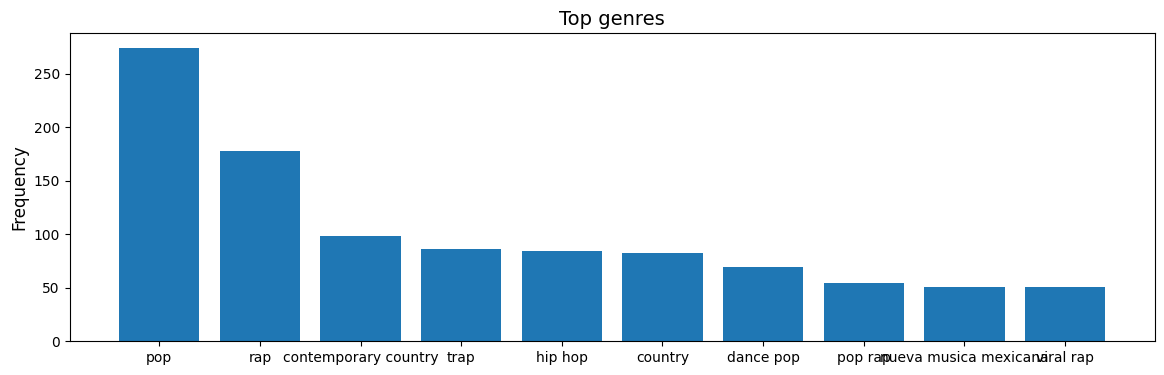

In [41]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(14, 4))
ax.bar(to_1D(track_df['artist_genres']).value_counts().index[:10],
       to_1D(track_df['artist_genres']).value_counts().values[:10])
ax.set_ylabel("Frequency", size=12)
ax.set_title("Top genres", size=14)
